<a href="https://colab.research.google.com/github/fakehaa/ML-PR/blob/main/ML%26PR_wk7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 7a: Visualizing Deep Learning Models usings VisualKeras

In [1]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

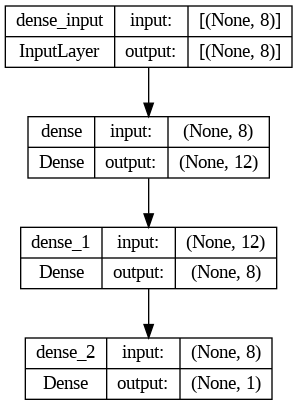

In [2]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [3]:
from keras import models
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout
from keras import layers

model = Sequential()
model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [4]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 5.6 MB/s eta 0:00:00


In [5]:
import keras
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers

In [6]:
model = Sequential()
model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

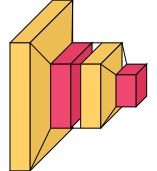

In [7]:
import visualkeras
visualkeras.layered_view(model)

In [8]:
model = Sequential()
model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        3136      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        65600     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 128)        

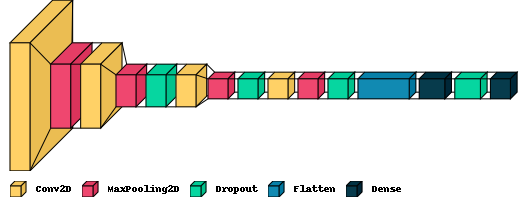

In [10]:
visualkeras.layered_view(model, legend=True)

### VGG Visualize

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [13]:
!pip install keras

In [14]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [15]:
train_path="cat-dog-dataset/train"
test_path="cat-dog-dataset/test"
val_path="cat-dog-dataset/val"

In [16]:
import os
import cv2
x_train=[]
for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_train.append(img_arr)

In [17]:
x_test=[]
for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_test.append(img_arr)

In [18]:
x_val=[]
for folder in os.listdir(val_path):
    sub_path=val_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_val.append(img_arr)


In [19]:
# Import the NumPy module
import numpy as np
# Convert the lists into NumPy arrays
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [20]:
test_x=test_x/255.0

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(train_path,target_size = (224, 224), batch_size = 32, class_mode = 'sparse')

Found 5003 images belonging to 2 classes.


In [22]:
test_set = test_datagen.flow_from_directory(test_path, target_size = (224, 224), batch_size = 32, class_mode = 'sparse')

Found 1610 images belonging to 2 classes.


In [23]:
val_set = val_datagen.flow_from_directory(val_path, target_size = (224, 224), batch_size = 32, class_mode = 'sparse')

Found 400 images belonging to 2 classes.


In [24]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes


In [25]:

training_set.class_indices
train_y.shape,test_y.shape,val_y.shape

((5003,), (1610,), (400,))

In [26]:
labels = {value: key for key, value in training_set.class_indices.items()}
print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : cat
1 : dog


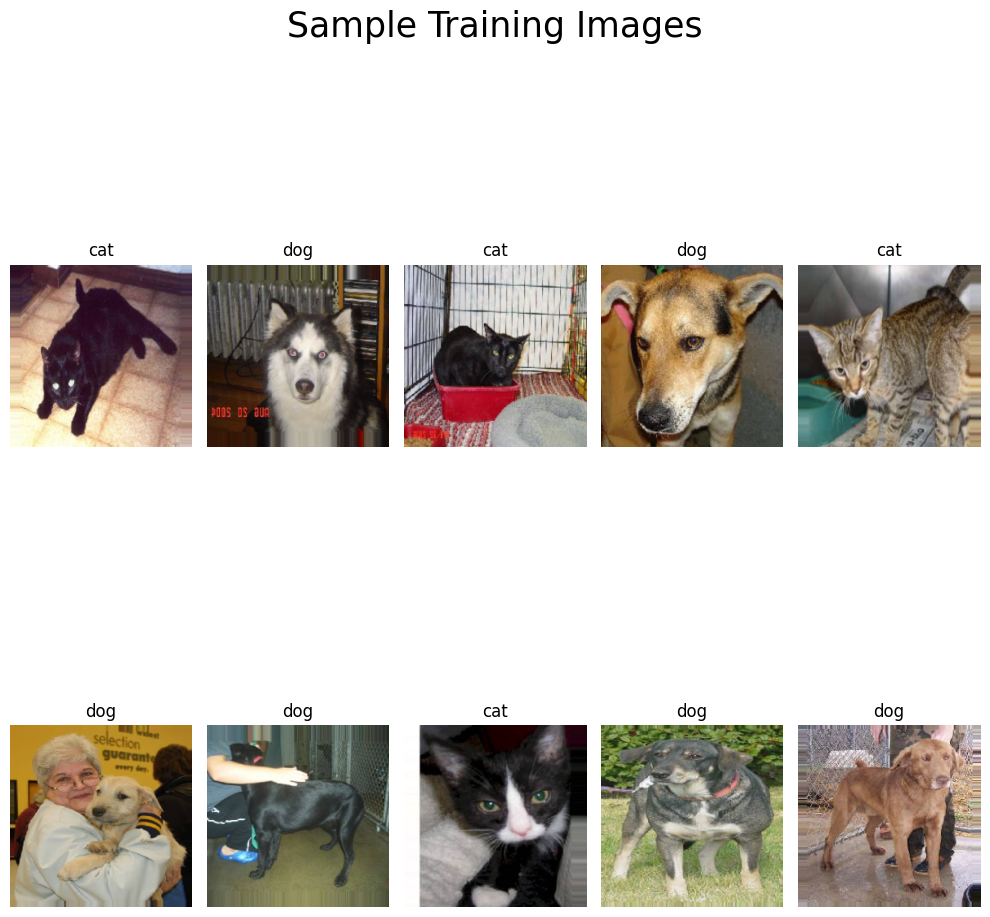

In [27]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 12))
idx = 0
for i in range(2):
    for j in range(5):
        label = labels[training_set[0][1][idx]]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(training_set[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1
plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=25)
plt.show()

In [31]:
from tensorflow.keras.applications import VGG19

vgg = VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False)
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

80134624/80134624 [==============================] - 0s 0us/step


In [32]:
from tensorflow.keras.layers import Flatten
x = Flatten()(vgg.output)

In [33]:

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(2, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)


In [34]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

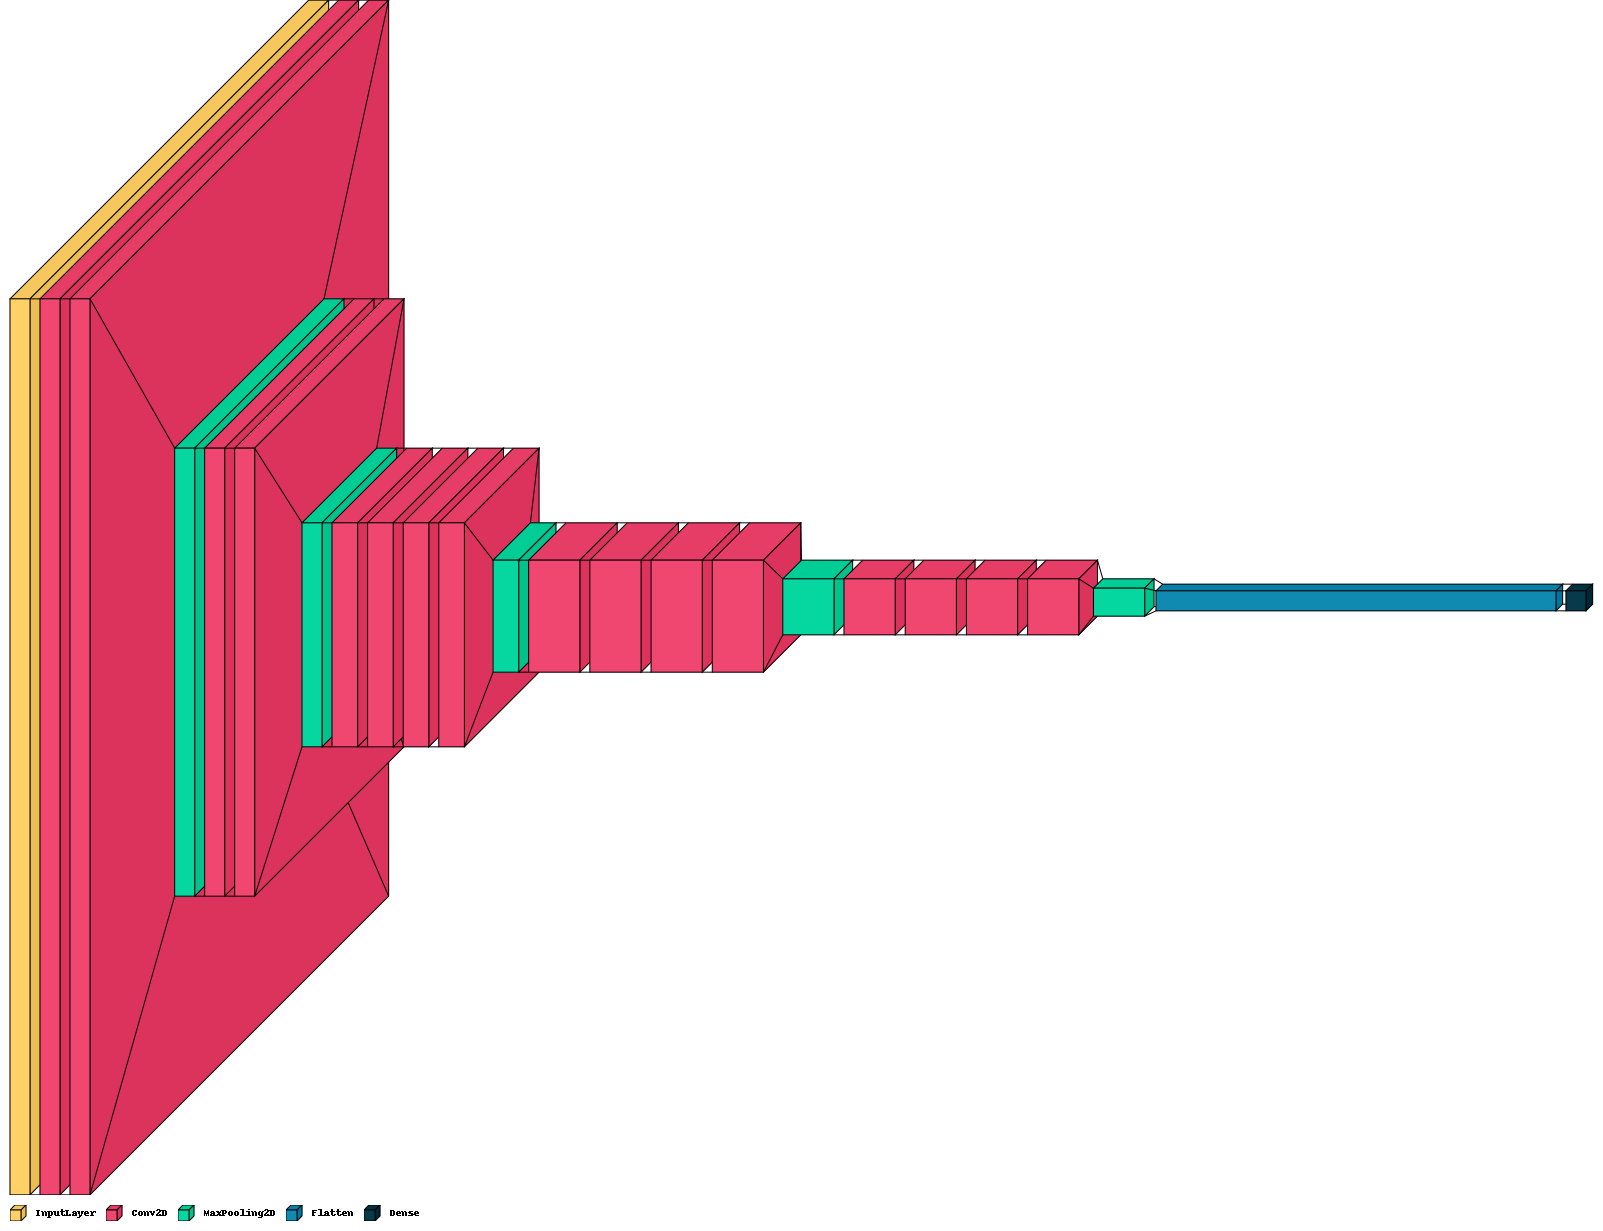

In [35]:
visualkeras.layered_view(model, legend=True)

# Lab 7b: OCR using CNN

In [36]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()  # data is imported from mnist (tensorflow dataset library)
print('Shape of the dataset.')
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

11490434/11490434 [==============================] - 0s 0us/step
Shape of the dataset.
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [37]:
train_labels_count = np.unique(y_train, return_counts=True)
test_labels_count = np.unique(y_test, return_counts=True)
dataframe_labels = pd.DataFrame({'Label':train_labels_count[0], 'Count Train':train_labels_count[1],'Count Test':test_labels_count[1]})
print(dataframe_labels.to_string(index=False))

 Label  Count Train  Count Test
     0         5923         980
     1         6742        1135
     2         5958        1032
     3         6131        1010
     4         5842         982
     5         5421         892
     6         5918         958
     7         6265        1028
     8         5851         974
     9         5949        1009


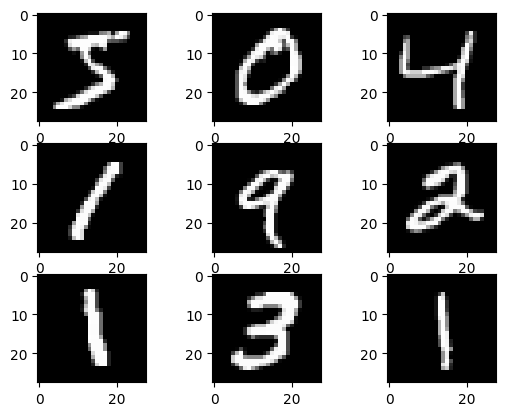

In [38]:
# 9 sample images of the dataset
for i in range(9):
	plt.subplot(331 + i)
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [39]:
print('Train dataset ranges from ', X_train.min(),' to ', X_train.max(),'.')
print('Train dataset mean value:', round(X_train.mean(),3))
print('Test dataset ranges from ', X_test.min(),' to ', X_test.max(),'.')
print('Test dataset mean value: ', round(X_test.mean(),3))

Train dataset ranges from  0  to  255 .
Train dataset mean value: 33.318
Test dataset ranges from  0  to  255 .
Test dataset mean value:  33.791


In [40]:
# Reshaping
# (sample index, height, width, colour channel)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize
# divided by 255 (pixel values are from 0 to 255) to get values between 0 and 1
X_train /= 255.0
X_test /= 255.0
print('Train dataset ranges from ', X_train.min(),' to ', X_train.max(),'.')
print('Train dataset mean value:', round(X_train.mean(),3))
print('Test dataset ranges from ', X_test.min(),' to ', X_test.max(),'.')
print('Test dataset mean value: ', round(X_test.mean(),3))


Train dataset ranges from  0.0  to  1.0 .
Train dataset mean value: 0.131
Test dataset ranges from  0.0  to  1.0 .
Test dataset mean value:  0.133


In [41]:
import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, Input, MaxPooling2D
#from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score

In [42]:
# one-hot encoding using numpy-related utilities of tensorflow's keras
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [43]:
model = Sequential()
# convolutional layer
model.add(Input(shape =(28,28,1)))
model.add(Conv2D(25, kernel_size=(3,3), strides=(2,2), padding='valid', activation='relu'))
#model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
# max pooling layer
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# Compiling the sequential model
# A loss function is one of the two mandatory arguments required for compiling a Keras model
# We are using categorical crossentropy because we are trying to solve a MULTI-CLASS classification problem
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')



In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        3136      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        65600     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 128)        

In [44]:
# training the model for 5 epochs
# (input features, target labels, number of samples per iteration of training, number of epochs, val. dataset specs)
hist = model.fit(X_train, Y_train, batch_size=256, epochs=5, validation_data=(X_test, Y_test))

Epoch 1/5
235/235 [==============================] - 8s 13ms/step - loss: 0.3796 - accuracy: 0.8991 - val_loss: 0.1497 - val_accuracy: 0.9558
Epoch 2/5
235/235 [==============================] - 2s 7ms/step - loss: 0.1228 - accuracy: 0.9647 - val_loss: 0.0959 - val_accuracy: 0.9719
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.0793 - accuracy: 0.9768 - val_loss: 0.0772 - val_accuracy: 0.9748
Epoch 4/5
235/235 [==============================] - 1s 5ms/step - loss: 0.0601 - accuracy: 0.9823 - val_loss: 0.0616 - val_accuracy: 0.9811
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.0471 - accuracy: 0.9861 - val_loss: 0.0605 - val_accuracy: 0.9803


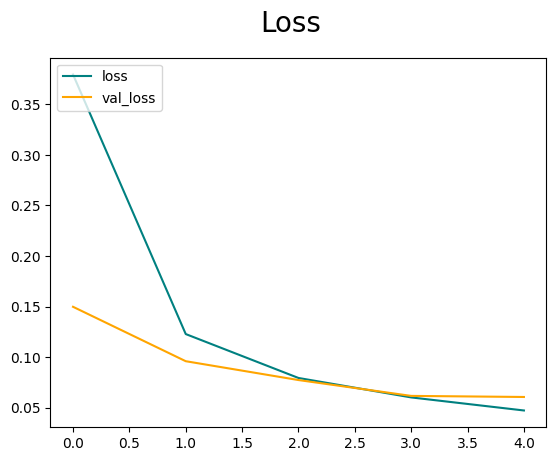

In [45]:
from matplotlib import pyplot as plt
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

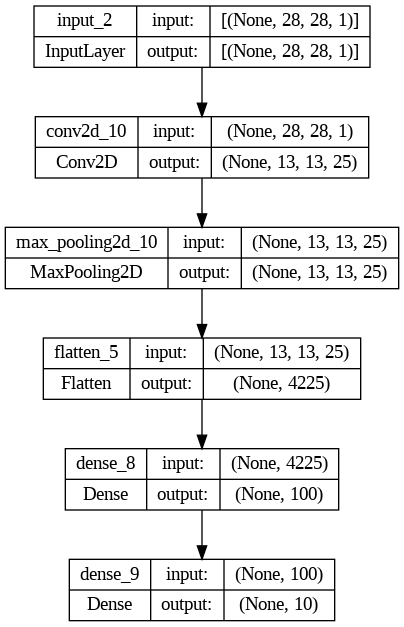

In [46]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

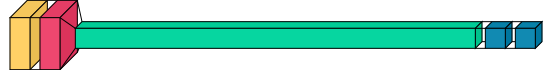

In [47]:
import visualkeras
visualkeras.layered_view(model)
#visualkeras.layered_view(model, legend=True)

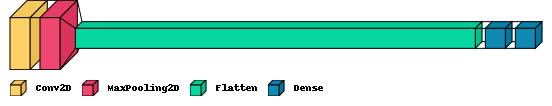

In [48]:
#Now we will add the legend to the visualization.
visualkeras.layered_view(model, legend=True)

No. of values in test dataset:  10000
1/1 [==============================] - 0s 34ms/step


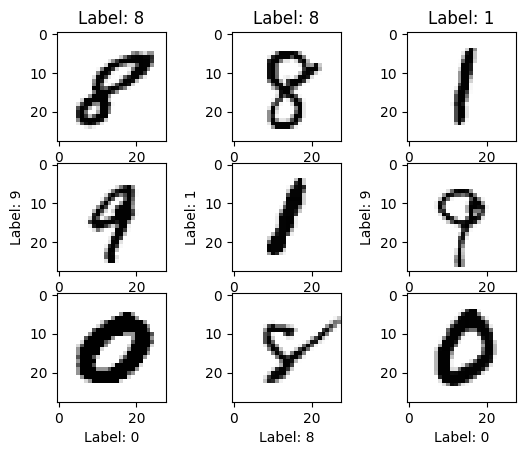

In [49]:
import random as r
print('No. of values in test dataset: ',X_test.shape[0])
for i in range (9):
  image_index=r.randint(0,10000)
  plt.subplot(331 + i)
  plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
  pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
  if i<3:
    plt.title('Label: ' + str(pred.argmax()))
  elif i>=3 and i<6:
    plt.ylabel('Label: ' + str(pred.argmax()))
  else:
    plt.xlabel('Label: ' + str(pred.argmax()))
plt.show()

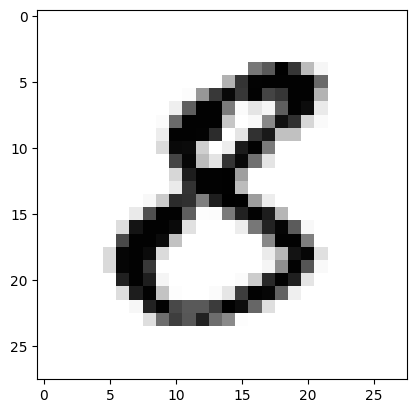

In [50]:
import time

test = 1234
plt.imshow(X_test[test].reshape(28, 28),cmap='Greys')

In [51]:
expected_label=Y_test[test].argmax()
digit_image = X_test[test].reshape(1, 28, 28, 1)
# repeat few times to take the average execution time
loop_count = 10

start_time = time.time()
for i in range(loop_count):
    prediction = model.predict(digit_image)
print("Keras inferences with %s second in average" %((time.time() - start_time) / loop_count))

print(prediction)
predicted_label = prediction.argmax()
print('Predicted value:', predicted_label)
if (expected_label == predicted_label):
  print('Correct prediction !')
else:
  print('Wrong prediction !')
#saving keras model
model.save('mnist-model.keras')

1/1 [==============================] - 0s 30ms/step
Keras inferences with 0.09682679176330566 second in average
[[5.8029887e-06 2.0599667e-07 7.3505187e-04 5.9460676e-03 7.8466599e-08
  1.6188670e-02 1.3260169e-04 1.5232368e-09 9.7698873e-01 2.7994915e-06]]
Predicted value: 8
Correct prediction !


In [52]:
#!pip install --upgrade protobuf
!pip install onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 42.7 MB/s eta 0:00:00


In [53]:
!pip install tf2onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 3.3 MB/s eta 0:00:00


In [54]:
import onnx
import os
os.environ['TF_KERAS'] = '1'
import tf2onnx

onnx_model_path = 'mnist-model.onnx'

model = keras.models.load_model('mnist-model.keras')
onnx_model, _ = tf2onnx.convert.from_keras(model)
onnx.save(onnx_model, onnx_model_path)

In [55]:
!pip install onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 13.3 MB/s eta 0:00:00


In [56]:
import onnxruntime

sess_options = onnxruntime.SessionOptions()
sess = onnxruntime.InferenceSession(onnx_model_path, sess_options)
data = [digit_image.astype(np.float32)]
input_names = sess.get_inputs()
feed = dict([(input.name, data[n]) for n, input in enumerate(sess.get_inputs())])

In [57]:
start_time = time.time()
for i in range(loop_count):
    onnx_predicted_label = sess.run(None, feed)[0].argmax()
print("ONNX inferences with %s second in average" %((time.time() - start_time) / loop_count))

print('ONNX predicted value:', onnx_predicted_label)
if (expected_label == onnx_predicted_label):
  print('Correct prediction !')
else:
  print('Wrong prediction !')

if (predicted_label == onnx_predicted_label):
  print("The ONNX's and keras' prediction are matching !")
else:
  print("The ONNX's and keras' prediction does not match !")

ONNX inferences with 0.00021626949310302735 second in average
ONNX predicted value: 8
Correct prediction !
The ONNX's and keras' prediction are matching !
